# NERC

**TODO: Add description**

In [1]:
# add all imports here
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
import os

from prettytable import PrettyTable

## Preprocessing
Change all instances of "geo" to "loc" and "gpe" to "misc" to match with the test set. 
Commented out since the new training set is already saved as a file to save time in future runs. 

In [2]:
#start_time = time.time()
#unprocessed_data = pd.read_csv(filepath_or_buffer="data/train/ner_dataset.csv", sep=",", error_bad_lines=False, encoding= "unicode_escape")
#unprocessed_data = unprocessed_data[:10000]
#for i, tag in enumerate(unprocessed_data["Tag"]):
#    if "geo" in tag:
#        unprocessed_data["Tag"][i] = unprocessed_data["Tag"][i].replace("geo", "loc")
#    elif "gpe" in tag:
#        unprocessed_data["Tag"][i] = unprocessed_data["Tag"][i].replace("gpe", "misc")
#print(unprocessed_data["Tag"][102])
#print("--- %s seconds ---" % (time.time() - start_time))
#unprocessed_data.to_csv(path_or_buf="data/train/new_ner_dataset.csv", sep=",", index=False)

## EDA

In [3]:
df = pd.read_csv('data/train/new_ner_dataset.csv', sep=",", error_bad_lines=False, encoding= "unicode_escape")

C:\Users\brsdr\AppData\Local\Temp/ipykernel_10844/371074509.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('data/train/new_ner_dataset.csv', sep=",", error_bad_lines=False, encoding= "unicode_escape")


In [4]:
df

,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,NaN,of,IN,O
2,NaN,demonstrators,NNS,O
3,NaN,have,VBP,O
4,NaN,marched,VBN,O
...,...,...,...,...
1048570,NaN,they,PRP,O
1048571,NaN,responded,VBD,O
1048572,NaN,to,TO,O
1048573,NaN,the,DT,O


In [5]:
# first insight into the data
print("Total number of sentences: ", len(df["Sentence #"].unique()))

print("Total number of words: ", len(df["Word"]))
print("Total number of unique words: ", len(df["Word"].unique()))

print("Total number of tags: ", len(df["Tag"]))
print("Total number of unique tags: ", len(df["Tag"].unique()))



Total number of sentences:  47960
Total number of words:  1048575
Total number of unique words:  35178
Total number of tags:  1048575
Total number of unique tags:  17


O         887908
B-loc      37644
B-tim      20333
B-org      20143
I-per      17251
B-per      16990
I-org      16784
B-misc     15870
I-loc       7414
I-tim       6528
B-art        402
B-eve        308
I-art        297
I-eve        253
B-nat        201
I-misc       198
I-nat         51
Name: Tag, dtype: int64


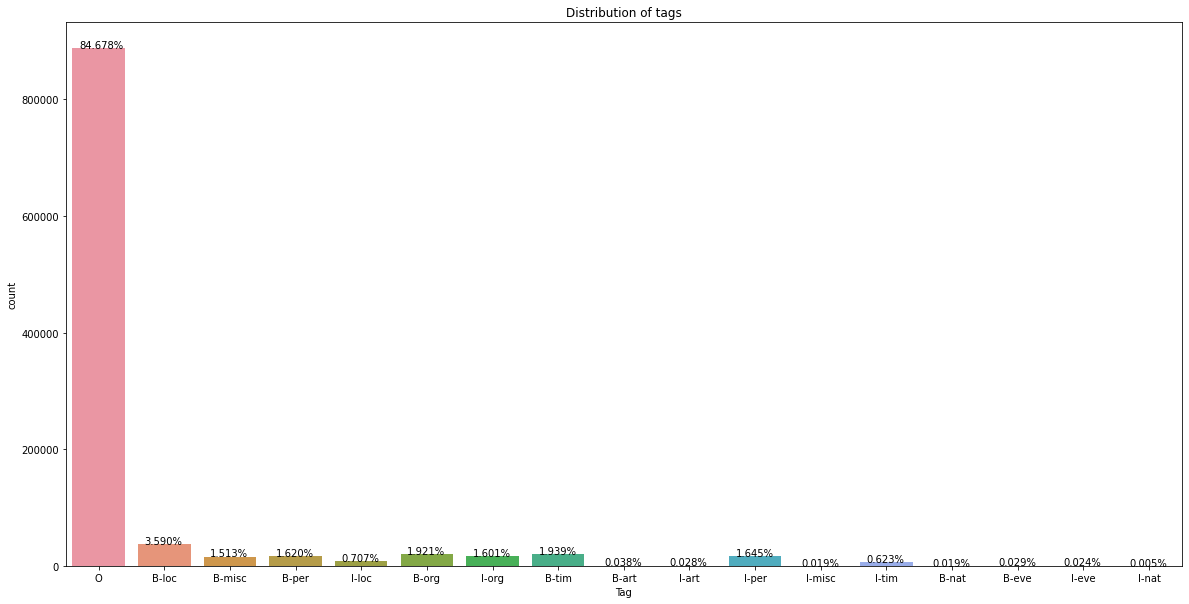

<Figure size 432x288 with 0 Axes>

In [6]:
# more insight into the data
print(df["Tag"].value_counts())

# plot the distribution of the tags
fig, ax = plt.subplots(figsize=(20,10))
sns.countplot(x="Tag", data=df)
# add counts and percentages to the plot
for p in ax.patches:
    ax.annotate('{:.3f}%'.format(100*p.get_height()/len(df)), (p.get_x()+0.1, p.get_height()+300))

# set the title of the plot
plt.title("Distribution of tags")
plt.show()
plt.savefig("figures/distribution_of_tags_barplot.png")





NN      145807
NNP     131426
IN      120996
DT       98454
JJ       78412
NNS      75840
.        47831
VBD      39379
,        32757
VBN      32328
VBZ      24960
CD       24695
VB       24211
CC       23716
TO       23061
RB       20252
VBG      19125
VBP      16158
PRP      13318
POS      11257
PRP$      8655
MD        6973
``        3728
WDT       3698
JJS       3034
JJR       2967
WP        2542
NNPS      2521
RP        2490
WRB       2184
$         1149
RBR       1055
:          795
RRB        679
LRB        678
EX         663
RBS        296
;          214
PDT        147
WP$         99
UH          24
FW           1
Name: POS, dtype: int64


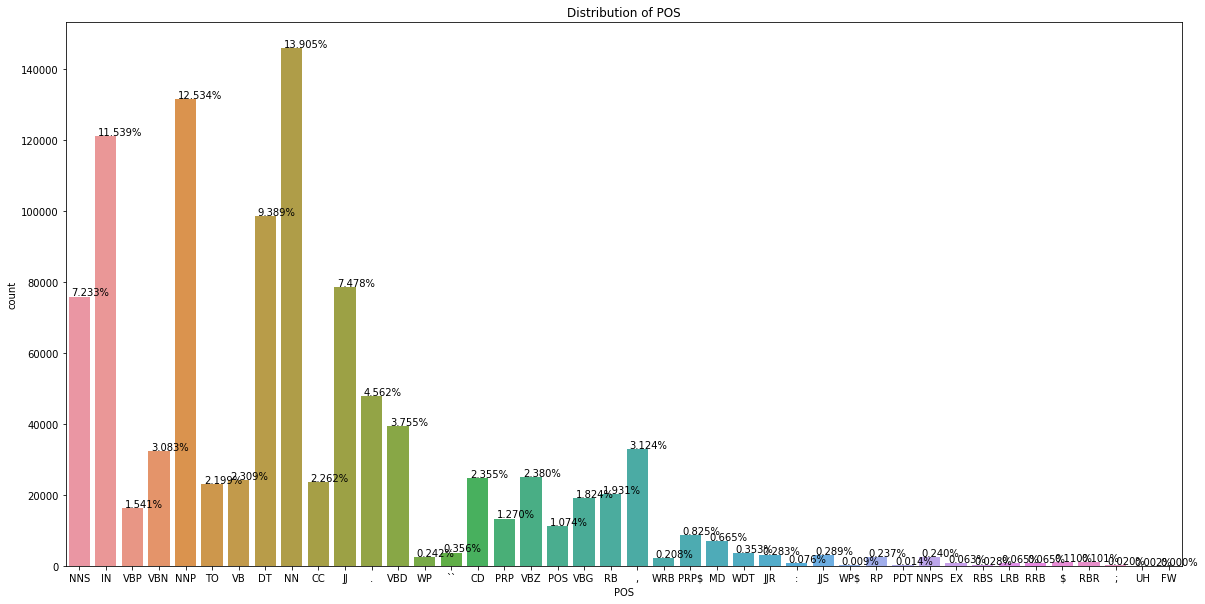

<Figure size 432x288 with 0 Axes>

In [7]:
# more insight into the data for POS tags (might be useful for the future)
print(df["POS"].value_counts())

# plot the distribution of the tags
fig, ax = plt.subplots(figsize=(20,10))
sns.countplot(x="POS", data=df)
# add counts and percentages to the plot
for p in ax.patches:
    ax.annotate('{:.3f}%'.format(100*p.get_height()/len(df)), (p.get_x()+0.1, p.get_height()+300))

# set the title of the plot
plt.title("Distribution of POS")
plt.show()
plt.savefig("figures/distribution_of_pos_barplot.png")



In [8]:
# fill the sentence # column with the sentence number
df["Sentence #"] = df["Sentence #"].fillna(method="ffill")

3     10621
4      9419
2      8856
1      7042
5      6551
6      3477
7      1440
8       461
9        86
10        5
11        1
Name: Tag, dtype: int64


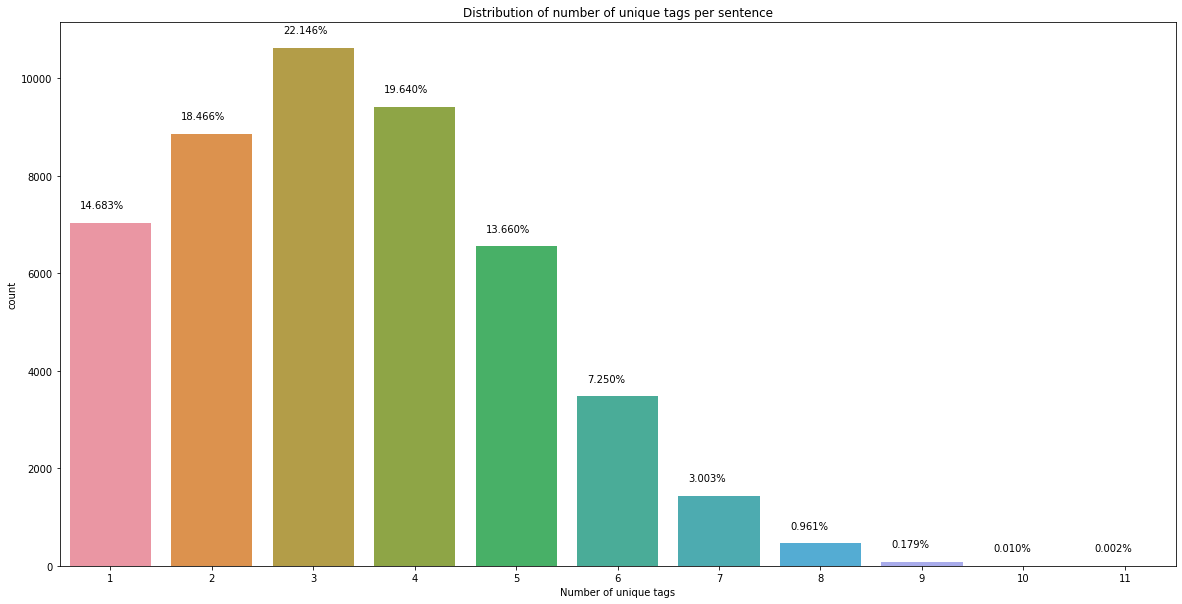

<Figure size 432x288 with 0 Axes>

In [9]:

# compare the unique tags on the sentence level

# get the unique tags for each sentence
unique_tags = df.groupby("Sentence #")["Tag"].unique()
# find the number of unique tags for each sentence
unique_tags_count = unique_tags.apply(lambda x: len(x))
# print the number of unique tags for each sentence
print(unique_tags_count.value_counts())

# create a df with the number of unique tags for each sentence
d = pd.DataFrame(unique_tags_count)
d = d.reset_index()
d.columns = ["Sentence #", "Number of unique tags"]


#plot the distribution of the number of unique tags for each sentence
fig, ax = plt.subplots(figsize=(20,10))
sns.countplot(x="Number of unique tags", data=d)
# add percentages to the plot
for p in ax.patches:
    ax.annotate('{:.3f}%'.format(100*p.get_height()/len(d)), (p.get_x()+0.1, p.get_height()+300))


# set the title of the plot
plt.title("Distribution of number of unique tags per sentence")
plt.show()
plt.savefig("figures/distribution_of_unique_tags_per_sentence_barplot.png")




## MODEL TRAINING

Prepare the data

In [10]:
import pandas
path = r'data/train/new_ner_dataset.csv'
kaggle_dataset = pandas.read_csv(path, error_bad_lines=False)
len(kaggle_dataset)

C:\Users\brsdr\AppData\Local\Temp/ipykernel_10844/3070577754.py:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  kaggle_dataset = pandas.read_csv(path, error_bad_lines=False)


1048575

In [11]:
test_data = pd.read_csv('data/test/NER-final-test.tsv', sep='\t')

Create train and test sets

In [12]:
df_train = kaggle_dataset[:1050000]
df_test = test_data
print(len(df_train), len(df_test))

1048575 214


In [13]:
df_train

,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,NaN,of,IN,O
2,NaN,demonstrators,NNS,O
3,NaN,have,VBP,O
4,NaN,marched,VBN,O
...,...,...,...,...
1048570,NaN,they,PRP,O
1048571,NaN,responded,VBD,O
1048572,NaN,to,TO,O
1048573,NaN,the,DT,O


In [14]:
df_test

,sentence id,token id,token,BIO NER tag
0,0,0,It,O
1,0,1,took,O
2,0,2,eight,O
3,0,3,years,O
4,0,4,for,O
...,...,...,...,...
209,9,12,get,O
210,9,13,into,O
211,9,14,this,O
212,9,15,one,O


Training the model

In [15]:
training_features = []
training_gold_labels = []
test_features = []
test_gold_labels = []

for index, row in df_train.iterrows():
    a_dict = {"words": row['Word']}
    training_features.append(a_dict)
    training_gold_labels.append(row['Tag'])

for index, row in df_test.iterrows():
    a_dict = {"words": row['token']}
    test_features.append(a_dict)
    test_gold_labels.append(row['BIO NER tag'])

# number of instances of train and test set
print("Number of training instances: ", len(training_features))
print("Number of test instances: ", len(test_features))

Number of training instances:  1048575
Number of test instances:  214


In [16]:
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer()
the_array = vec.fit_transform(training_features + test_features)
train_array = the_array[:len(training_features)]
test_array = the_array[len(training_features):]

In [17]:
from sklearn import svm
lin_clf = svm.LinearSVC()
lin_clf.fit(train_array, training_gold_labels)

LinearSVC()

## EVALUATION

In [46]:
predicted_labels = lin_clf.predict(test_array)
predicted_labels_real=[]
for i in predicted_labels:
    if i == "B-org":
         predicted_labels_real.append("B-ORG")
    elif i == "I-org":
         predicted_labels_real.append("I-ORG")
    elif i == "B-loc":
         predicted_labels_real.append("B-LOC")
    elif i == "I-loc":
         predicted_labels_real.append("I-LOC")
    elif i == "B-misc":
         predicted_labels_real.append("B-MISC")
    elif i == "B-per":
         predicted_labels_real.append("B-PER")
    elif i == "I-per":
         predicted_labels_real.append("I-PER")
    elif i == "I-art":
         predicted_labels_real.append("I-ART")
    elif i == "I-tim":
         predicted_labels_real.append("I-TIM")
    else:
        predicted_labels_real.append(i)

In [49]:

from sklearn.metrics import accuracy_score
print("Accuracy: ", accuracy_score(test_gold_labels, predicted_labels_real))

from sklearn.metrics import confusion_matrix
#print("Confusion matrix: \n", confusion_matrix(test_gold_labels, predicted_labels))

from sklearn.metrics import classification_report
print("Classification report: \n", classification_report(test_gold_labels, predicted_labels_real))

Accuracy:  0.9205607476635514
Classification report: 
               precision    recall  f1-score   support

       B-LOC       0.50      0.50      0.50         4
      B-MISC       0.75      1.00      0.86         3
       B-ORG       1.00      0.25      0.40         4
       B-PER       1.00      0.50      0.67         6
       I-ART       0.00      0.00      0.00         0
       I-LOC       0.67      1.00      0.80         2
      I-MISC       0.00      0.00      0.00         1
       I-ORG       0.67      0.67      0.67         3
       I-PER       0.50      0.25      0.33         8
       I-TIM       0.00      0.00      0.00         0
           O       0.96      0.99      0.98       183

    accuracy                           0.92       214
   macro avg       0.55      0.47      0.47       214
weighted avg       0.92      0.92      0.91       214



C:\Users\brsdr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\brsdr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\brsdr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifie

In [50]:
print(predicted_labels_real)
print(test_gold_labels)

['O', 'O', 'O', 'O', 'O', 'B-ORG', 'I-ORG', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-LOC', 'I-LOC', 'I-ORG', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-MISC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PER', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'I-PER', 'O', 'O', 'O', 'B-LOC', 'O', 'I-PER', 'O', 'O', 'O', 'O', 'O', 'O', 'B-MISC', 'B-MISC', 'O', 'O', 'O', 'O', 'O', 'I-ORG', 'O', 'B-PER', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'I-PER', 'I-TIM', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'I-ART', 'O', 'I-PER', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PER', 'O', 'O', 'O', 

### VALIDATION SET

### TEST SET